In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [207]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [208]:
def predict(features, weights):
    return sigmoid(np.dot(features, weights))

In [209]:
def loss_function(features, labels, weights):
    m = len(labels)
    predictions = predict(features, weights)
    error = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions)
    cost = 1/m * np.sum(error)
    return cost

In [210]:
def gradient_descent(features, labels, weights, learning_rate, epochs):
    m = len(labels)
    
    for epoch in range(epochs):
        predictions = predict(features, weights)
        error = predictions - labels
        gradient = np.dot(features.T, error) / m
        weights -= learning_rate * gradient
        
        # In loss sau mỗi epoch
        if epoch % 100 == 0:
            cost = loss_function(features, labels, weights)
            print(f'Epoch {epoch}, Loss: {cost}')

    return weights

In [211]:
df = pd.read_csv('framingham.csv')

In [212]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [213]:
df = df.dropna()

In [214]:
selected_features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
df = df[selected_features]

In [215]:
features = df.drop('TenYearCHD', axis=1).values
labels = df['TenYearCHD'].values


In [216]:
features = np.column_stack((np.ones(len(labels)), features))

In [217]:
weights = np.random.rand(features.shape[1])

In [218]:
learning_rate = 0.01
epochs = 1000

In [219]:
trained_weights = gradient_descent(features, labels, weights, learning_rate, epochs)

C:\Users\FPT\AppData\Local\Temp\ipykernel_33788\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\FPT\AppData\Local\Temp\ipykernel_33788\3836312217.py:4: RuntimeWarning: divide by zero encountered in log
  error = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions)
C:\Users\FPT\AppData\Local\Temp\ipykernel_33788\3836312217.py:4: RuntimeWarning: invalid value encountered in multiply
  error = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions)


Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: inf
Epoch 300, Loss: nan
Epoch 400, Loss: inf
Epoch 500, Loss: 31.255424610069483
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: 29.928521159291066
Epoch 900, Loss: nan


In [220]:
print('Trained Weights:', trained_weights)

Trained Weights: [ 0.64702984  0.327895    1.27771807  0.71718221  0.89302778  0.41534004
  0.80107547  1.12351305  0.97431028 -1.123512    0.9743168  -1.69624251
 -0.55492319 -2.23688717  0.08924216]


In [221]:
def predict_new_data(new_data, weights):
    new_data_with_bias = np.column_stack((np.ones(len(new_data)), new_data))
    
    probabilities = predict(new_data_with_bias, weights)
    
    predictions = (probabilities >= 0.5).astype(int)
    
    return predictions

In [222]:
new_data_point = np.array([[1, 60, 0, 20, 0, 0, 1, 0, 250, 120, 80, 26.57, 95, 33]])
predicted_result = predict_new_data(new_data_point, trained_weights)

if predicted_result[0] == 1:
    print("Có khả năng mắc bệnh tim.")
else:
    print("Không có khả năng mắc bệnh tim.")

Không có khả năng mắc bệnh tim.


In [223]:
def plot_decision_boundary(features, labels, weights):
    plt.scatter(features[:, 1], labels, color='blue', marker='o', label='Class 0')
    plt.scatter(features[:, 1], 1-labels, color='red', marker='x', label='Class 1')
    
    x_values = np.array([np.min(features[:, 1]), np.max(features[:, 1])])
    y_values = -(weights[0] + weights[1]*x_values) / weights[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    
    plt.xlabel('Feature')
    plt.ylabel('Class')
    plt.legend()
    plt.title('Decision Boundary of Logistic Regression')
    plt.show()

In [224]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression_model(features, labels, weights):
    predictions = predict(features, weights)
    mse = mean_squared_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')


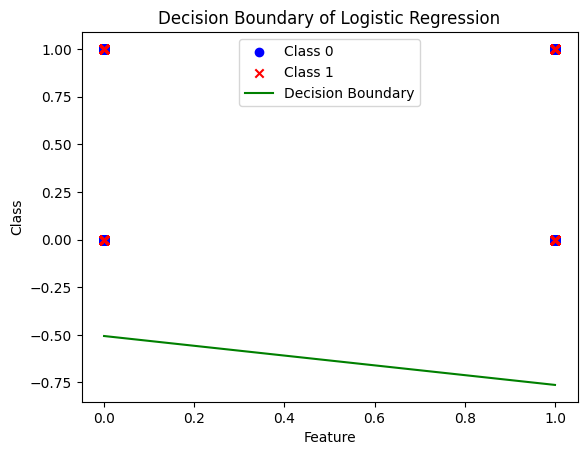

In [225]:
plot_decision_boundary(features, labels, trained_weights)

In [226]:
evaluate_regression_model(features, labels, trained_weights)

Mean Squared Error: 0.15235229759299782
R-squared: -0.17973539851565046


C:\Users\FPT\AppData\Local\Temp\ipykernel_33788\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [227]:
def plot_confusion_matrix(features, labels, weights):
    predictions = predict(features, weights)
    binary_predictions = (predictions >= 0.5).astype(int)
    
    cm = confusion_matrix(labels, binary_predictions)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


C:\Users\FPT\AppData\Local\Temp\ipykernel_33788\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


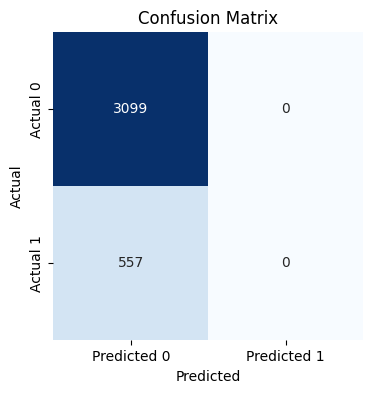

In [228]:
plot_confusion_matrix(features, labels, trained_weights)